# Stochastic Gradient Descent

Epoch 0, Loss: 0.28730811279078095
Epoch 1000, Loss: 0.28419970034033526
Epoch 2000, Loss: 0.30647496389864964
Epoch 3000, Loss: 0.25464759928309977
Epoch 4000, Loss: 0.2654587906500112
Epoch 5000, Loss: 0.2540139123197369
Epoch 6000, Loss: 0.24677485480172545
Epoch 7000, Loss: 0.2381633929314762
Epoch 8000, Loss: 0.24012231080869406
Epoch 9000, Loss: 0.2599019965863934
Epoch 10000, Loss: 0.24343410684304678


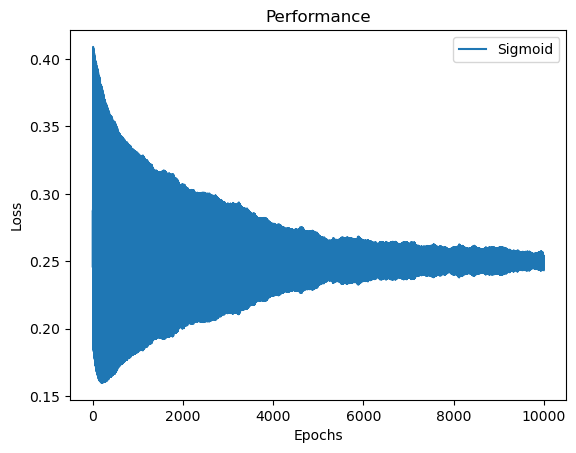

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def initialize_weights(input_size, hidden_size, output_size):
    np.random.seed(42)
    weights_input_hidden = np.random.randn(input_size, hidden_size)
    weights_hidden_output = np.random.randn(hidden_size, output_size)
    return weights_input_hidden, weights_hidden_output

def forward_propagation(inputs, weights_input_hidden, weights_hidden_output):
    hidden_layer_input = np.dot(inputs, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    output_layer_output = sigmoid(output_layer_input)

    return hidden_layer_output, output_layer_output

def calculate_loss(targets, predictions):
    return np.mean((targets - predictions) ** 2)

def backward_propagation(inputs, targets, hidden_layer_output, output_layer_output,
                         weights_input_hidden, weights_hidden_output, learning_rate):
    output_error = targets - output_layer_output
    output_delta = output_error * sigmoid_derivative(output_layer_output)

    hidden_layer_error = output_delta.dot(weights_hidden_output.T)
    hidden_layer_delta = hidden_layer_error * sigmoid_derivative(hidden_layer_output)

    weights_hidden_output += hidden_layer_output.T.dot(output_delta) * learning_rate
    weights_input_hidden += inputs.T.dot(hidden_layer_delta) * learning_rate

def train_neural_network(inputs, targets, hidden_size, output_size, learning_rate, epochs):
    input_size = inputs.shape[1]
    weights_input_hidden, weights_hidden_output = initialize_weights(input_size, hidden_size, output_size)
    loss_history =[]
    
    # Using shuffle() method 
    inputs_shuffled = inputs 
    
    for epoch in range(epochs+1):
        np.random.shuffle(inputs_shuffled)
        #inputs_shuffled = np.random.shuffle(inputs).reshape(4,2)
        hidden_layer_output, output_layer_output = forward_propagation(inputs_shuffled, weights_input_hidden, weights_hidden_output)

        backward_propagation(inputs_shuffled, targets, hidden_layer_output, output_layer_output,
                             weights_input_hidden, weights_hidden_output, learning_rate)

        loss = calculate_loss(targets, output_layer_output)
        loss_history.append(loss)
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return loss_history

inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [1], [1], [0]])

hidden_size = 10
output_size = 1
learning_rate = 0.01
epochs = 10000

loss_history = train_neural_network(inputs, targets, hidden_size, output_size, learning_rate, epochs)

plt.plot(loss_history,label="Sigmoid")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Performance")
plt.legend()
plt.show()

# # Stochastic Gradient Descent with TensorFlow

Epoch 0: Loss 68.24557495117188
Epoch 100: Loss 62.1698112487793
Epoch 200: Loss 62.14022445678711
Epoch 300: Loss 62.17174530029297
Epoch 400: Loss 62.138336181640625
Epoch 500: Loss 62.107017517089844
Epoch 600: Loss 62.19357681274414
Epoch 700: Loss 62.15648651123047
Epoch 800: Loss 62.165550231933594
Epoch 900: Loss 62.17388916015625


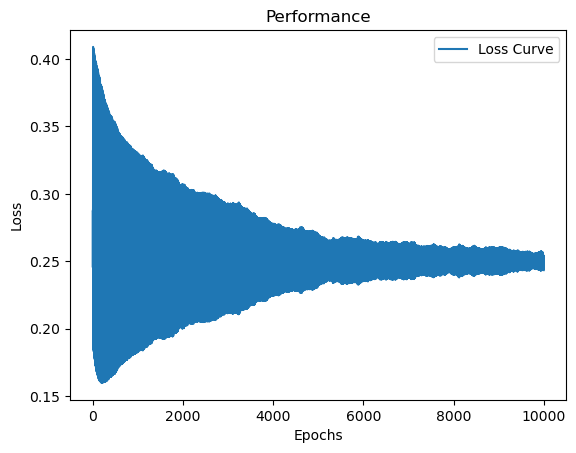

In [26]:
import tensorflow as tf
import numpy as np

class SGD:
    def __init__(self, lr=0.001, epochs=2000, batch_size=32, tol=1e-3):
        self.learning_rate = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.tolerance = tol
        self.weights = None
        self.bias = None

    def predict(self, X):
        return tf.matmul(X, self.weights) + self.bias

    def mean_squared_error(self, y_true, y_pred):
        return tf.reduce_mean(tf.square(y_true - y_pred))

    def gradient(self, X_batch, y_batch):
        with tf.GradientTape() as tape:
            y_pred = self.predict(X_batch)
            loss = self.mean_squared_error(y_batch, y_pred)
        gradient_weights, gradient_bias = tape.gradient(loss, [self.weights, self.bias])
        return gradient_weights, gradient_bias

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = tf.Variable(tf.random.normal((n_features, 1)))
        self.bias = tf.Variable(tf.random.normal(()))
        loss_history=[]
        
        for epoch in range(self.epochs):
            indices = tf.random.shuffle(tf.range(n_samples))
            X_shuffled = tf.gather(X, indices)
            y_shuffled = tf.gather(y, indices)

            for i in range(0, n_samples, self.batch_size):
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]

                gradient_weights, gradient_bias = self.gradient(X_batch, y_batch)
                # Gradient clipping
                gradient_weights = tf.clip_by_value(gradient_weights, -1, 1)
                gradient_bias = tf.clip_by_value(gradient_bias, -1, 1)
                
                self.weights.assign_sub(self.learning_rate * gradient_weights)
                self.bias.assign_sub(self.learning_rate * gradient_bias)
                y_pred = self.predict(X)
                loss = self.mean_squared_error(y, y_pred)
                loss_history.append(loss)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss {loss}")

            if tf.norm(gradient_weights) < self.tolerance:
                print("Convergence reached.")
                break

        return self.weights.numpy(), self.bias.numpy() , loss_history
'''X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])'''

X = np.random.randn(100, 5).astype(np.float32)
# Create corresponding target value by adding random
# noise in the dataset
y = np.dot(X, np.array([1, 2, 3, 4, 5], dtype=np.float32)) + np.random.randn(100).astype(np.float32) * 0.1

# Create an instance of the SGD class
model = SGD(lr=0.005, epochs=1000, batch_size=12, tol=1e-3)
w, b , loss = model.fit(X, y)

# Predict using predict method from model
y_pred = np.dot(X, w) + b

plt.plot(loss_history,label="Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Performance")
plt.legend()
plt.show()